In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns



# preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from nltk import FreqDist


# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score


In [2]:
lemma=WordNetLemmatizer()

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


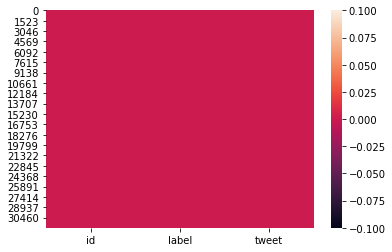

In [5]:
sns.heatmap(train.isnull())

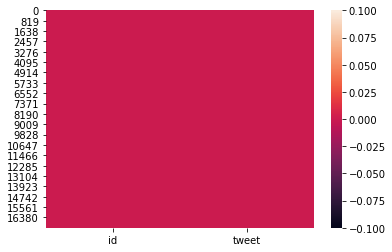

In [6]:
sns.heatmap(test.isnull())

In [7]:
def normalizer(tweets):
#     expr='@\S+|#\S+|[^A-Za-z]+'
#     tweets=re.sub(expr,' ',tweets)
    tweets = " ".join(filter(lambda x: x[0]!= '@', tweets.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets=tweets.lower()
    tweets=tweets.split()
    tweets=[twt for twt in tweets if twt not in stopwords.words('english')]
    tweets=[lemma.lemmatize(word) for word in tweets]
    tweets=' '.join(tweets)
    return tweets

In [8]:
normalizer('#Rishav and @paudel are good #guyz')

'rishav good guyz'

In [9]:
df1=train.copy()


In [10]:
df1['normalized_text']=df1.tweet.apply(normalizer)

In [11]:
df1.head()

,id,label,tweet,normalized_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [12]:
def hashtag_tweet(tweet):
    tweets=' '.join(filter(lambda x: x[0]=='#',tweet.split()))
    tweets=re.sub('[^A-Za-z]',' ',tweets)
    tweets=tweets.lower()
    tweets=[lemma.lemmatize(word) for word in tweets]
    tweets=''.join(tweets)
    return tweets
    

In [13]:
hashtag_tweet('my name is #rishav, #paudel').split()

['rishav', 'paudel']

In [14]:
df1['hashtag']=df1.tweet.apply(hashtag_tweet)

In [15]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [16]:
df2=df1.copy()

In [17]:
df2.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [18]:
all_words=' '.join(df2.normalized_text)

In [19]:
len(all_words)

1700028

In [20]:
hatred_words=' '.join(df2[df2['label']==1].normalized_text)

In [21]:
hatred_words[:100]

'cnn call michigan middle school build wall chant tcot comment australia opkillingbay seashepherd hel'

In [22]:
len(hatred_words)

129320

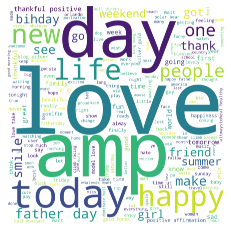

In [23]:
wordcloud=WordCloud(height=4000,width=4000,stopwords=STOPWORDS,
                   background_color='white')
wordcloud=wordcloud.generate(all_words)
pl.imshow(wordcloud)
pl.axis('off')
pl.show()

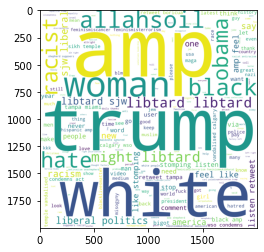

In [24]:
wordcloud=WordCloud(height=2000,width=2000,stopwords=STOPWORDS,
                   background_color='white')
wordcloud=wordcloud.generate(hatred_words)
pl.imshow(wordcloud)
pl.axis('On')
pl.show()

In [25]:
freqs=nltk.FreqDist(list((' '.join(df2.hashtag)).split()))

In [26]:
freqs=freqs.most_common(10)
freqs

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [27]:
list((' '.join(df2.hashtag)).split())[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

In [28]:
list(df2.hashtag)[:10]

[' run',
 ' lyft  disapointed  getthanked',
 '',
 ' model',
 ' motivation',
 ' allshowandnogo',
 '',
 ' school  exams  hate  imagine  actorslife  revolutionschool  girl',
 ' allin  cavs  champions  cleveland  clevelandcavaliers',
 ' gr ']

In [29]:
(' '.join(df2.hashtag)).split()[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

In [30]:
freq_hashtag=nltk.FreqDist(list((' '.join(df2[df2['label']==1]['hashtag'])).split())).most_common(10)
freq_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [31]:
df_allhashtag=pd.DataFrame(freqs,columns=['Words','frequency'])
df_hatredhashtag=pd.DataFrame(freq_hashtag,columns=['Words','frequency'])

In [32]:
df_allhashtag

,Words,frequency
0,love,1591
1,positive,879
2,smile,577
3,healthy,576
4,thankful,471
5,fun,463
6,life,438
7,summer,392
8,model,366
9,cute,364


In [33]:
df_hatredhashtag

,Words,frequency
0,trump,134
1,politics,95
2,allahsoil,92
3,libtard,76
4,liberal,75
5,sjw,74
6,retweet,63
7,miami,46
8,black,44
9,hate,32


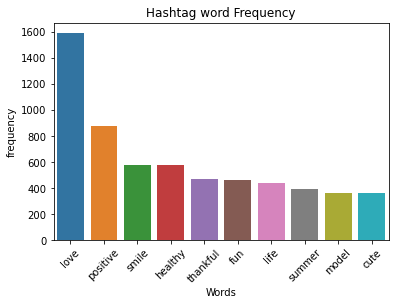

In [34]:
sns.barplot(data=df_allhashtag,x='Words',y='frequency')
pl.xticks(rotation=45)
pl.title('Hashtag word Frequency')
pl.show()

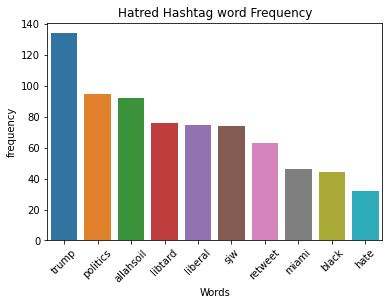

In [35]:
sns.barplot(data=df_hatredhashtag,x='Words',y='frequency')
pl.xticks(rotation=45)
pl.title('Hatred Hashtag word Frequency')
pl.show()

In [37]:
dflen=len(df2)
corpus=[]
for i in range(dflen):
    corpus.append(df2['normalized_text'][i])

In [39]:
corpus[:10]

['father dysfunctional selfish drag kid dysfunction run',
 'thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay dispute get allshowandnogo',
 'camping tomorrow danny',
 'next school year year exam think school exam hate imagine actorslife revolutionschool girl',
 'love land allin cavs champion cleveland clevelandcavaliers',
 'welcome gr']

In [45]:
cv=CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [50]:
tv=TfidfVectorizer(stop_words=stopwords.words('english'))
tv.fit(corpus)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [47]:
X=cv.transform(corpus).toarray()
y=df2.iloc[:,1].values

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [58]:
X_train.shape

(21414, 35089)

In [56]:
X_train[:5,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
logisticreg=LogisticRegression()
logisticreg.fit(X_train,y_train)
logisticreg.score(X_train,y_train),logisticreg.score(X_test,y_test)

(0.9826281871672737, 0.9611300720515737)

In [67]:
tv=TfidfVectorizer(ngram_range=(1,3),min_df=10,stop_words=stopwords.words('english'))
tv.fit(corpus)
X=tv.transform(corpus).toarray()
y=df2.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape)
logisticreg=LogisticRegression()
logisticreg.fit(X_train,y_train)
logisticreg.score(X_train,y_train),logisticreg.score(X_test,y_test)

(21414, 4408)


(0.9546091342112637, 0.9538301099734546)

In [68]:
from gensim.models import Word2Vec

In [69]:
vecs=Word2Vec(corpus,size=100,window=5,min_count=1,workers=8)